In [1]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load Dataset
df = pd.read_csv('data/salaries.csv')

### Visualize relationships

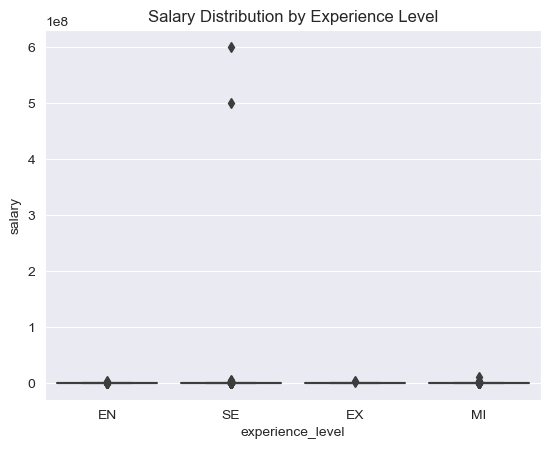

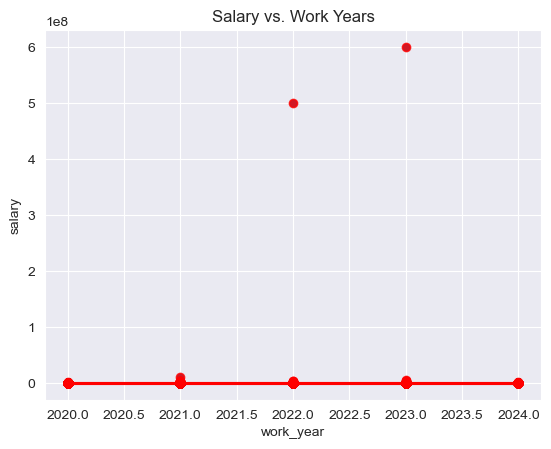

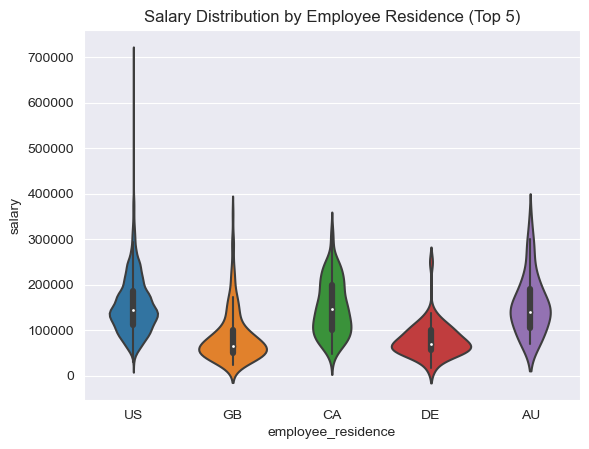

In [3]:
# Choose factors to visualize (examples):
factor1 = "experience_level"  # Categorical factor
factor2 = "work_year"  # Numerical factor
factor3 = "employee_residence"  # Categorical factor

# Visualize relationships:

# Boxplot for categorical factor
sns.boxplot(data=df, x=factor1, y="salary")
plt.title("Salary Distribution by Experience Level")
plt.show()

# Scatter plot with trendline for numerical factor
sns.scatterplot(data=df, x=factor2, y="salary")
plt.title("Salary vs. Work Years")
plt.xlabel("Work Years")
plt.ylabel("Salary")
sns.regplot(data=df, x=factor2, y="salary", color="red")
plt.show()

# Violin plot for top 5 categories in factor3
top5_categories = df[factor3].value_counts().nlargest(5).index
df_top5 = df[df[factor3].isin(top5_categories)]

sns.violinplot(data=df_top5, x=factor3, y="salary")
plt.title("Salary Distribution by Employee Residence (Top 5)")
plt.show()

In [4]:
# Example: Average salary by experience level
avg_salary_by_experience = df.groupby('experience_level')['salary'].mean()
avg_salary_by_experience

experience_level
EN     96415.379233
EX    230281.454106
MI    142302.351045
SE    479307.246319
Name: salary, dtype: float64

### Average salary by experience level

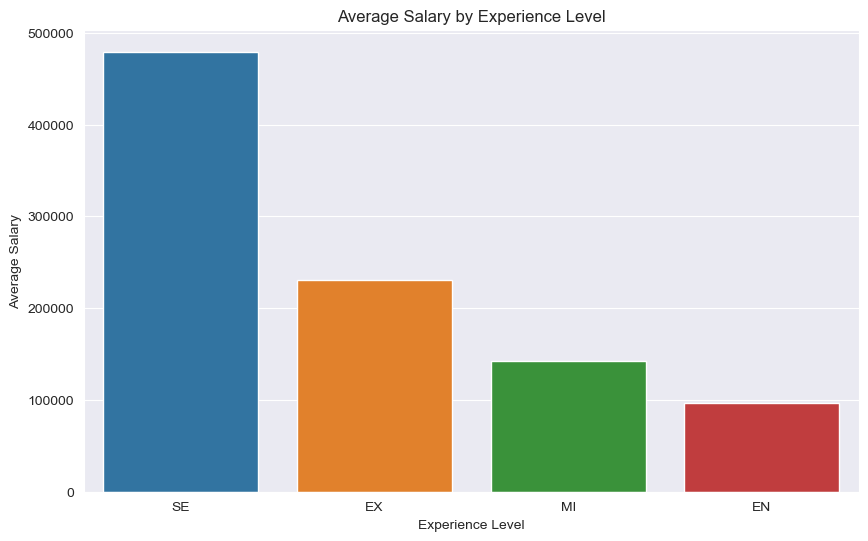

In [9]:
# Calculate average salary by experience level
avg_salary_by_experience = df.groupby('experience_level')['salary'].mean().sort_values(ascending=False)

# Plotting a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_salary_by_experience.index, y=avg_salary_by_experience.values)
plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary')
plt.show()

### Average salary by employment type

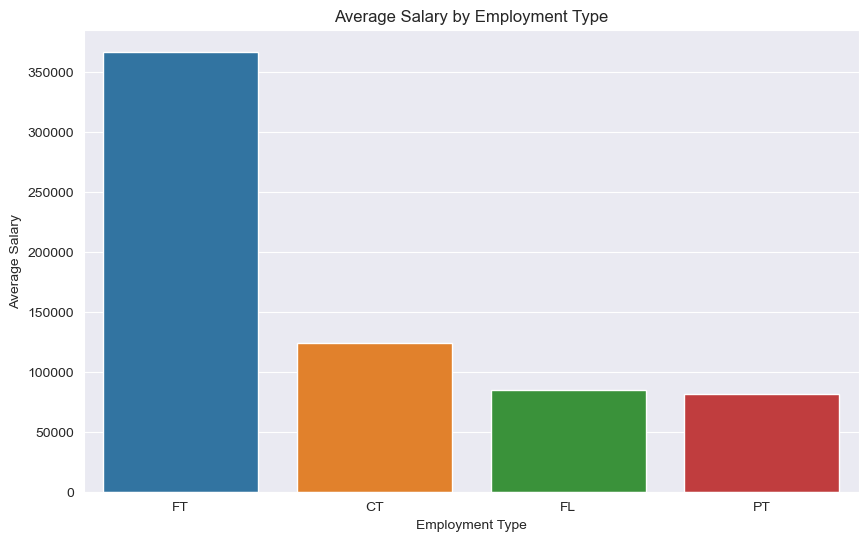

In [10]:
# Calculate average salary by employment type
avg_salary_by_employment = df.groupby('employment_type')['salary'].mean().sort_values(ascending=False)

# Plotting a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_salary_by_employment.index, y=avg_salary_by_employment.values)
plt.title('Average Salary by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Average Salary')
plt.show()

### Average salary by company size

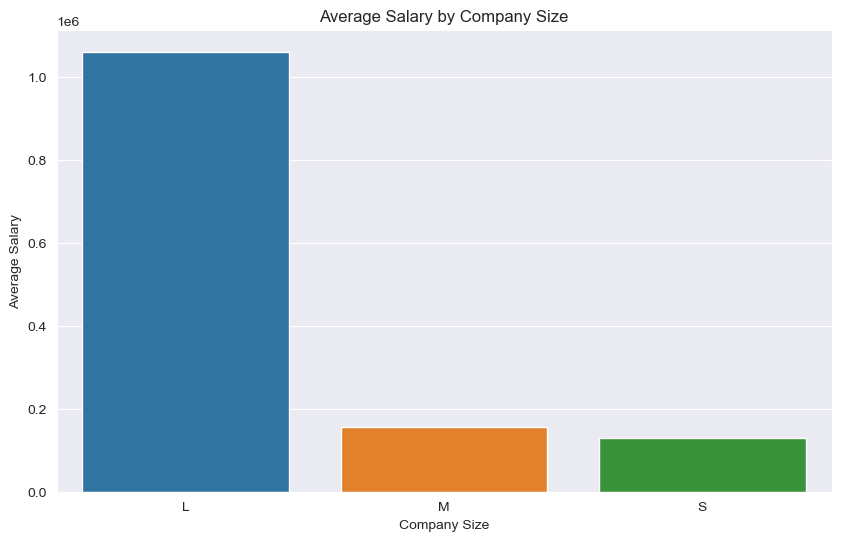

In [11]:
# Calculate average salary by company size
avg_salary_by_size = df.groupby('company_size')['salary'].mean().sort_values(ascending=False)

# Plotting a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_salary_by_size.index, y=avg_salary_by_size.values)
plt.title('Average Salary by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Average Salary')
plt.show()

### Average salary by job title

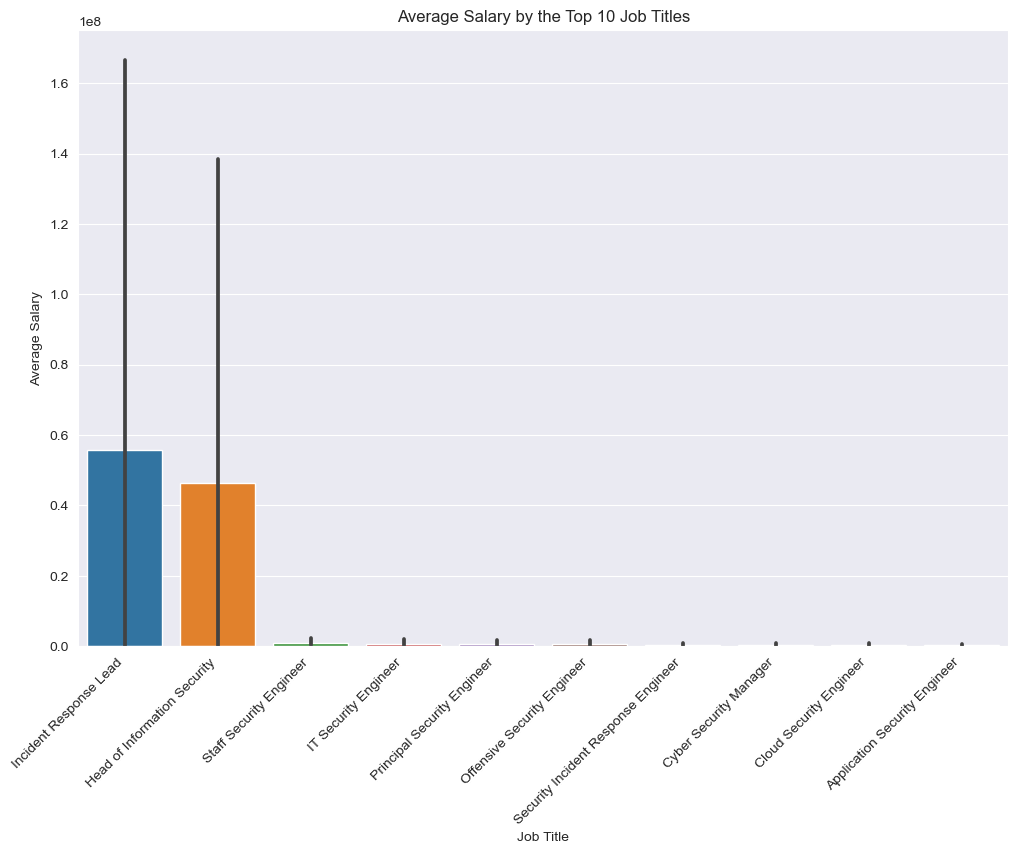

In [14]:
# Select the top 10 job titles based on average salary
top_10_job_titles = df.groupby('job_title')['salary'].mean().sort_values(ascending=False).head(10).index

# Filter the DataFrame to include only the top 10 job titles
df_top_10_job_titles = df[df['job_title'].isin(top_10_job_titles)]

# Plotting a bar plot for average salary by the top 10 job titles
plt.figure(figsize=(12, 8))
sns.barplot(x='job_title', y='salary', data=df_top_10_job_titles, order=top_10_job_titles)
plt.title('Average Salary by the Top 10 Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()